In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy import constants as c

### 1. Plot data with error bars along with a model for the data

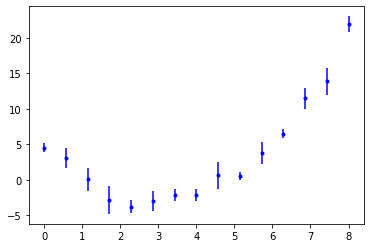

In [22]:
data = np.loadtxt('data_handouts/data1.txt', skiprows=1).transpose()

x = data[0]
y = data[1]
y_err = data[-1]


plt.errorbar(x,y,y_err, fmt='.', c='b')
plt.show()

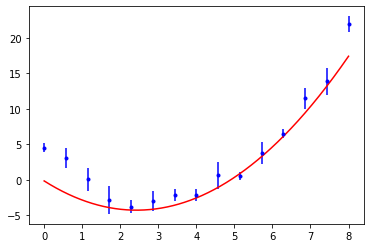

In [51]:
def quadratic_fit(x,a,b,c):
    return a*x**2+b*x+c

x_fit = np.linspace(0,8,1000)
y_fit = quadratic_fit(x_fit-2.5,0.7,0.1,-4.3)

plt.errorbar(x,y,y_err, fmt='.', c='b')
plt.plot(x_fit,y_fit, c='r')
plt.show()

### 2. Model data with error bars using curve fitting

In [83]:
data = np.loadtxt('data_handouts/data1.txt', skiprows=1).transpose()

#print(data)

x = data[0]
y = data[1]
y_err = data[-1]

def poly1(x,a,b):
    return a*x+b
def poly2(x,a,b,c):
    return a*x**2+b*x+c
def poly3(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

[ 1.16870947 -1.68814608] 
 [[ 0.38281828 -1.46218023]
 [-1.46218023  7.82742239]]

[ 0.94983993 -5.603129    4.75577297] 
 [[ 0.00135534 -0.0096628   0.00919489]
 [-0.0096628   0.07623432 -0.09360441]
 [ 0.00919489 -0.09360441  0.21253825]]

[ 0.02617431  0.64759159 -4.7429324   4.5129477 ] 
 [[ 2.75871770e-04 -3.18563487e-03  9.06629450e-03 -2.55932818e-03]
 [-3.18563487e-03  3.79924114e-02 -1.13292966e-01  3.77372059e-02]
 [ 9.06629450e-03 -1.13292966e-01  3.65803547e-01 -1.67416669e-01]
 [-2.55932818e-03  3.77372059e-02 -1.67416669e-01  2.12899280e-01]]



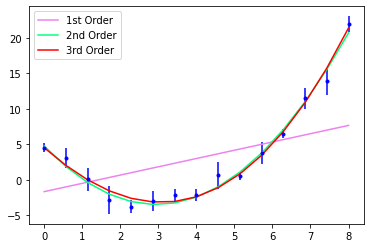

In [91]:
functions = [poly1, poly2, poly3]
y_fits = []

for poly in functions:
    opt_vals = curve_fit(f=poly, xdata=x, ydata=y, sigma=y_err)[0]
    covs = curve_fit(f=poly, xdata=x, ydata=y, sigma=y_err)[1]
    if poly == poly1:
        y_fits.append(poly(x,opt_vals[0],opt_vals[1]))
    elif poly == poly2:
        y_fits.append(poly(x,opt_vals[0],opt_vals[1],opt_vals[2]))
    else:
        y_fits.append(poly(x,opt_vals[0],opt_vals[1],opt_vals[2],opt_vals[3]))
    print(opt_vals,'\n',covs)
    print('')
    
plt.errorbar(x,y,y_err, fmt='.', c='b')
plt.plot(x,y_fits[0], c='violet', label='1st Order')
plt.plot(x,y_fits[1], c='springgreen', label='2nd Order')
plt.plot(x,y_fits[2], c='r', label='3rd Order')
plt.legend()
plt.show()

In [102]:
chi_sq = []

for i in range(3):
    chi_sq.append(sum((y-y_fits[i])**2/y_fits[i]))

print(chi_sq)

[90.34310852863625, -2.836769873514237, -3.8996124537393064]


### 3. Plot residuals

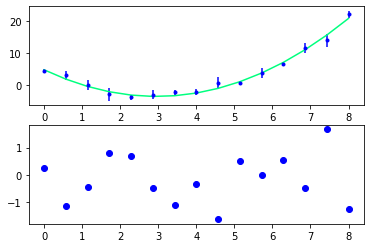

In [113]:
residuals = y_fits - y

fig, ax = plt.subplots(2)

ax[0].errorbar(x,y,y_err, fmt='.', c='b')
ax[0].plot(x, y_fits[1], c='springgreen')
ax[1].scatter(x, residuals[1], c='b')

plt.show()

### 4. More polynomial fits to data

[ 0.67504917 -1.2869057 ] 
 [[ 0.00612519 -0.02143815]
 [-0.02143815  0.10361774]]

[ 0.03921789  0.40052396 -0.98950338] 
 [[ 0.00167336 -0.01171349  0.01268961]
 [-0.01171349  0.08815793 -0.11039962]
 [ 0.01268961 -0.11039962  0.20049586]]

[-0.02197925  0.27000004 -0.22368684 -0.68948655] 
 [[ 0.00048194 -0.00506038  0.01368712 -0.00657849]
 [-0.00506038  0.05480702 -0.15542596  0.08176129]
 [ 0.01368712 -0.15542596  0.47685477 -0.29720697]
 [-0.00657849  0.08176129 -0.29720697  0.29025256]]



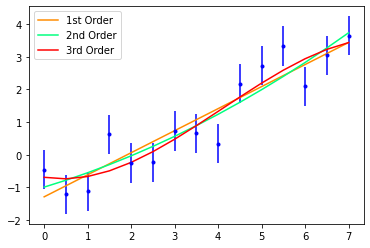

[0.35375090374786644, -2.7872408107507147, -0.4853014770207449]


In [121]:
data = np.loadtxt('data_handouts/data2.txt', skiprows=1).transpose()

x = data[0]
y = data[1]
y_err = data[-1]

def poly1(x,a,b):
    return a*x+b
def poly2(x,a,b,c):
    return a*x**2+b*x+c
def poly3(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

###

functions = [poly1, poly2, poly3]
y_fits = []

for poly in functions:
    opt_vals = curve_fit(f=poly, xdata=x, ydata=y, sigma=y_err)[0]
    covs = curve_fit(f=poly, xdata=x, ydata=y, sigma=y_err)[1]
    if poly == poly1:
        y_fits.append(poly(x,opt_vals[0],opt_vals[1]))
    elif poly == poly2:
        y_fits.append(poly(x,opt_vals[0],opt_vals[1],opt_vals[2]))
    else:
        y_fits.append(poly(x,opt_vals[0],opt_vals[1],opt_vals[2],opt_vals[3]))
    print(opt_vals,'\n',covs)
    print('')
    
plt.errorbar(x,y,y_err, fmt='.', c='b')
plt.plot(x,y_fits[0], c='darkorange', label='1st Order')
plt.plot(x,y_fits[1], c='springgreen', label='2nd Order')
plt.plot(x,y_fits[2], c='r', label='3rd Order')
plt.legend()
plt.show()

###

chi_sq = []

for i in range(3):
    chi_sq.append(sum((y-y_fits[i])**2/y_fits[i]))

print(chi_sq)

### 5. Fit to data with unknown uncertainties

[ 0.24135561 -1.06915666] 
 [[6.24873690e-03 3.43137093e-12]
 [3.43137093e-12 1.95113589e-02]]

[ 0.29922808  0.24135561 -2.00348094] 
 [[ 6.52779071e-04 -6.71634433e-12 -2.03826903e-03]
 [-6.71634433e-12  1.62865833e-03  2.34571345e-11]
 [-2.03826903e-03  2.34571345e-11  1.14497917e-02]]

[-0.10046161  0.29922808  0.80568962 -2.00348093] 
 [[ 5.83814191e-05 -7.66411096e-13 -3.27952336e-04  1.42493848e-12]
 [-7.66411096e-13  1.40175815e-04  4.22276076e-12 -4.37691766e-04]
 [-3.27952336e-04  4.22276076e-12  2.19197575e-03 -8.27515312e-12]
 [ 1.42493848e-12 -4.37691766e-04 -8.27515312e-12  2.45869389e-03]]



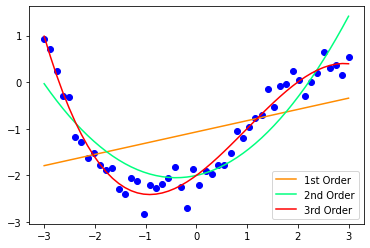

[-41.85642763653734, -37.143238486593305, -0.488143527570742]


In [124]:
data = np.loadtxt('data_handouts/data3.txt', skiprows=1).transpose()

x = data[0]
y = data[1]

def poly1(x,a,b):
    return a*x+b
def poly2(x,a,b,c):
    return a*x**2+b*x+c
def poly3(x,a,b,c,d):
    return a*x**3+b*x**2+c*x+d

###

functions = [poly1, poly2, poly3]
y_fits = []

for poly in functions:
    opt_vals = curve_fit(f=poly, xdata=x, ydata=y)[0]
    covs = curve_fit(f=poly, xdata=x, ydata=y)[1]
    if poly == poly1:
        y_fits.append(poly(x,opt_vals[0],opt_vals[1]))
    elif poly == poly2:
        y_fits.append(poly(x,opt_vals[0],opt_vals[1],opt_vals[2]))
    else:
        y_fits.append(poly(x,opt_vals[0],opt_vals[1],opt_vals[2],opt_vals[3]))
    print(opt_vals,'\n',covs)
    print('')
    
plt.scatter(x,y, c='b')
plt.plot(x,y_fits[0], c='darkorange', label='1st Order')
plt.plot(x,y_fits[1], c='springgreen', label='2nd Order')
plt.plot(x,y_fits[2], c='r', label='3rd Order')
plt.legend()
plt.show()

###

chi_sq = []

for i in range(3):
    chi_sq.append(sum((y-y_fits[i])**2/y_fits[i]))

print(chi_sq)

### 6. Fit a sine wave

[3.01750919 0.70163983 2.88937058 1.98500064] 
 [[ 2.07685920e-03  6.28220918e-06  1.64959217e-05  2.17123372e-04]
 [ 6.28220918e-06  7.67705714e-06 -3.46171740e-05  1.52751929e-05]
 [ 1.64959217e-05 -3.46171740e-05  6.50980890e-04 -1.16342147e-04]
 [ 2.17123372e-04  1.52751929e-05 -1.16342147e-04  1.11167301e-03]]



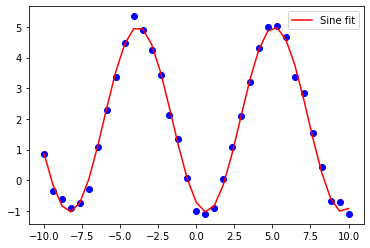

1.718630698949618


In [140]:
data = np.loadtxt('data_handouts/wavedata.txt', skiprows=1).transpose()

x = data[0]
y = data[1]

def sine(x,a,b,h,k):
    return a*np.sin(b*(x-h))+k

###

y_fits = []

opt_vals = curve_fit(f=sine, xdata=x, ydata=y)[0]
covs = curve_fit(f=sine, xdata=x, ydata=y)[1]
y_fits = (sine(x,opt_vals[0],opt_vals[1],opt_vals[2],opt_vals[3]))
print(opt_vals,'\n',covs)
print('')
    
plt.scatter(x,y, c='b')
plt.plot(x,y_fits, c='r', label='Sine fit')
plt.legend()
plt.show()

###

chi_sq = sum((y-y_fits)**2/y_fits)

print(chi_sq)

### 7. The Madelung constant of an ionic solid

In [138]:
M = 0
n = 0

L = int(input("Enter lattice size: "))
r = int(input("Distance between atoms: "))

for i in range(-L,L+1):
    for j in range(-L,L+1):
        for k in range(-L,L+1):
            n += 1
            distance = r * np.sqrt(i**2 + j**2 + k**2)
            if (i == j == k == 0):
                continue
            potential = c.e / (4 * np.pi * c.epsilon_0 * distance)
            if (i+j+k)%2 == 1:
                potential *= -1
            M += potential

print("Madelung constant:",M,"due to",n-1,"atoms.")

Enter lattice size: 10
Distance between atoms: 1
Madelung constant: -2.437253651119102e-09 due to 9260 atoms.
